# Adaptation of training-stats-combined.ipynb

But for comparing alpha vs beta results.

In [13]:
from pathlib import Path

# folders_alpha = list((Path.cwd() / "results-new-alpha" / "symbolic" / "random").glob("*"))
# folders_beta = list((Path.cwd() / "results-new-beta" / "symbolic" / "random").glob("*"))
# folders_alpha = list((Path.cwd() / "results-new-alpha" / "symbolic" / "atchley").glob("*"))
# folders_beta = list((Path.cwd() / "results-new-beta" / "symbolic" / "atchley").glob("*"))
# folders_alpha = list((Path.cwd() / "results-new-alpha" / "symbolic" / "kidera").glob("*"))
# folders_beta = list((Path.cwd() / "results-new-beta" / "symbolic" / "kidera").glob("*"))
# folders_alpha = list((Path.cwd() / "results-new-alpha" / "symbolic" / "aaprop").glob("*"))
# folders_beta = list((Path.cwd() / "results-new-beta" / "symbolic" / "aaprop").glob("*"))
# folders_alpha = list((Path.cwd() / "results-new-alpha" / "tcr-bert").glob("*"))
# folders_beta = list((Path.cwd() / "results-new-beta" / "tcr-bert").glob("*"))
folders_alpha = list((Path.cwd() / "results-new-alpha" / "sceptr").glob("*"))
folders_beta = list((Path.cwd() / "results-new-beta" / "sceptr").glob("*"))

rolling_window = 20
endofepoch = False
avoid_premature = 10

In [14]:
import matplotlib.pyplot as plt
from utils.retrieve_stats import *
import numpy as np

folders_alpha.sort()
folders_beta.sort()

results_alpha = [getstats(i, rolling_window=rolling_window, endofepoch=endofepoch) for i in folders_alpha]
results_beta = [getstats(i, rolling_window=rolling_window, endofepoch=endofepoch) for i in folders_beta]

for r in results_alpha:
    print(r["foldername"])
    print(find_bestepoch(r, avoid_premature=avoid_premature))
    print()

for r in results_beta:
    print(r["foldername"])
    print(find_bestepoch(r, avoid_premature=avoid_premature))
    print()

bestepochs_alpha = [find_bestepoch(i, avoid_premature=avoid_premature) for i in results_alpha]
bestepochs_beta = [find_bestepoch(i, avoid_premature=avoid_premature) for i in results_beta]

plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams["figure.autolayout"] = True


/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-0
49

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-1
27

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-2
16

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-3
11

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-4
43

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-5
15

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-6
35

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-7
49

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-8
15

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-alpha/sceptr/trained-sceptr-9
20

/Users/janp/Desktop/fyp/tcr-cancer-prediction/results-new-beta/sceptr/trained-sc

alpha


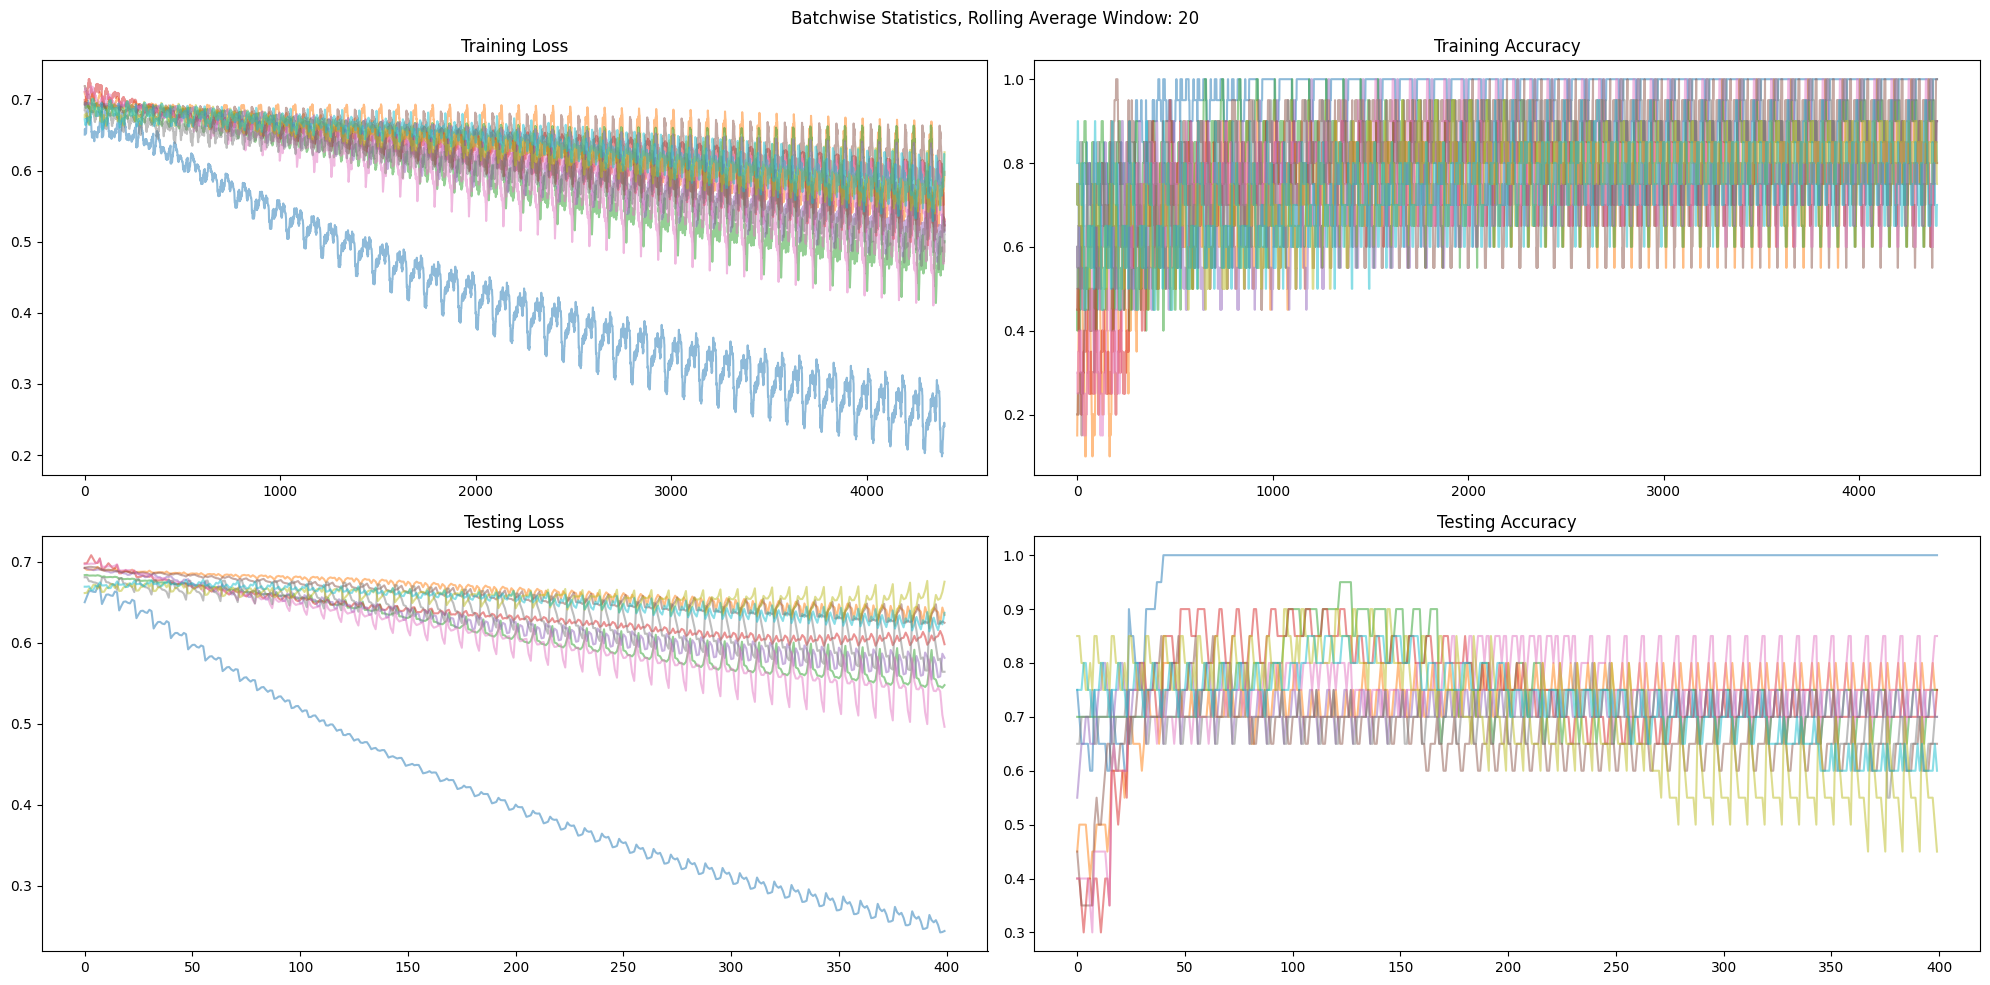

beta


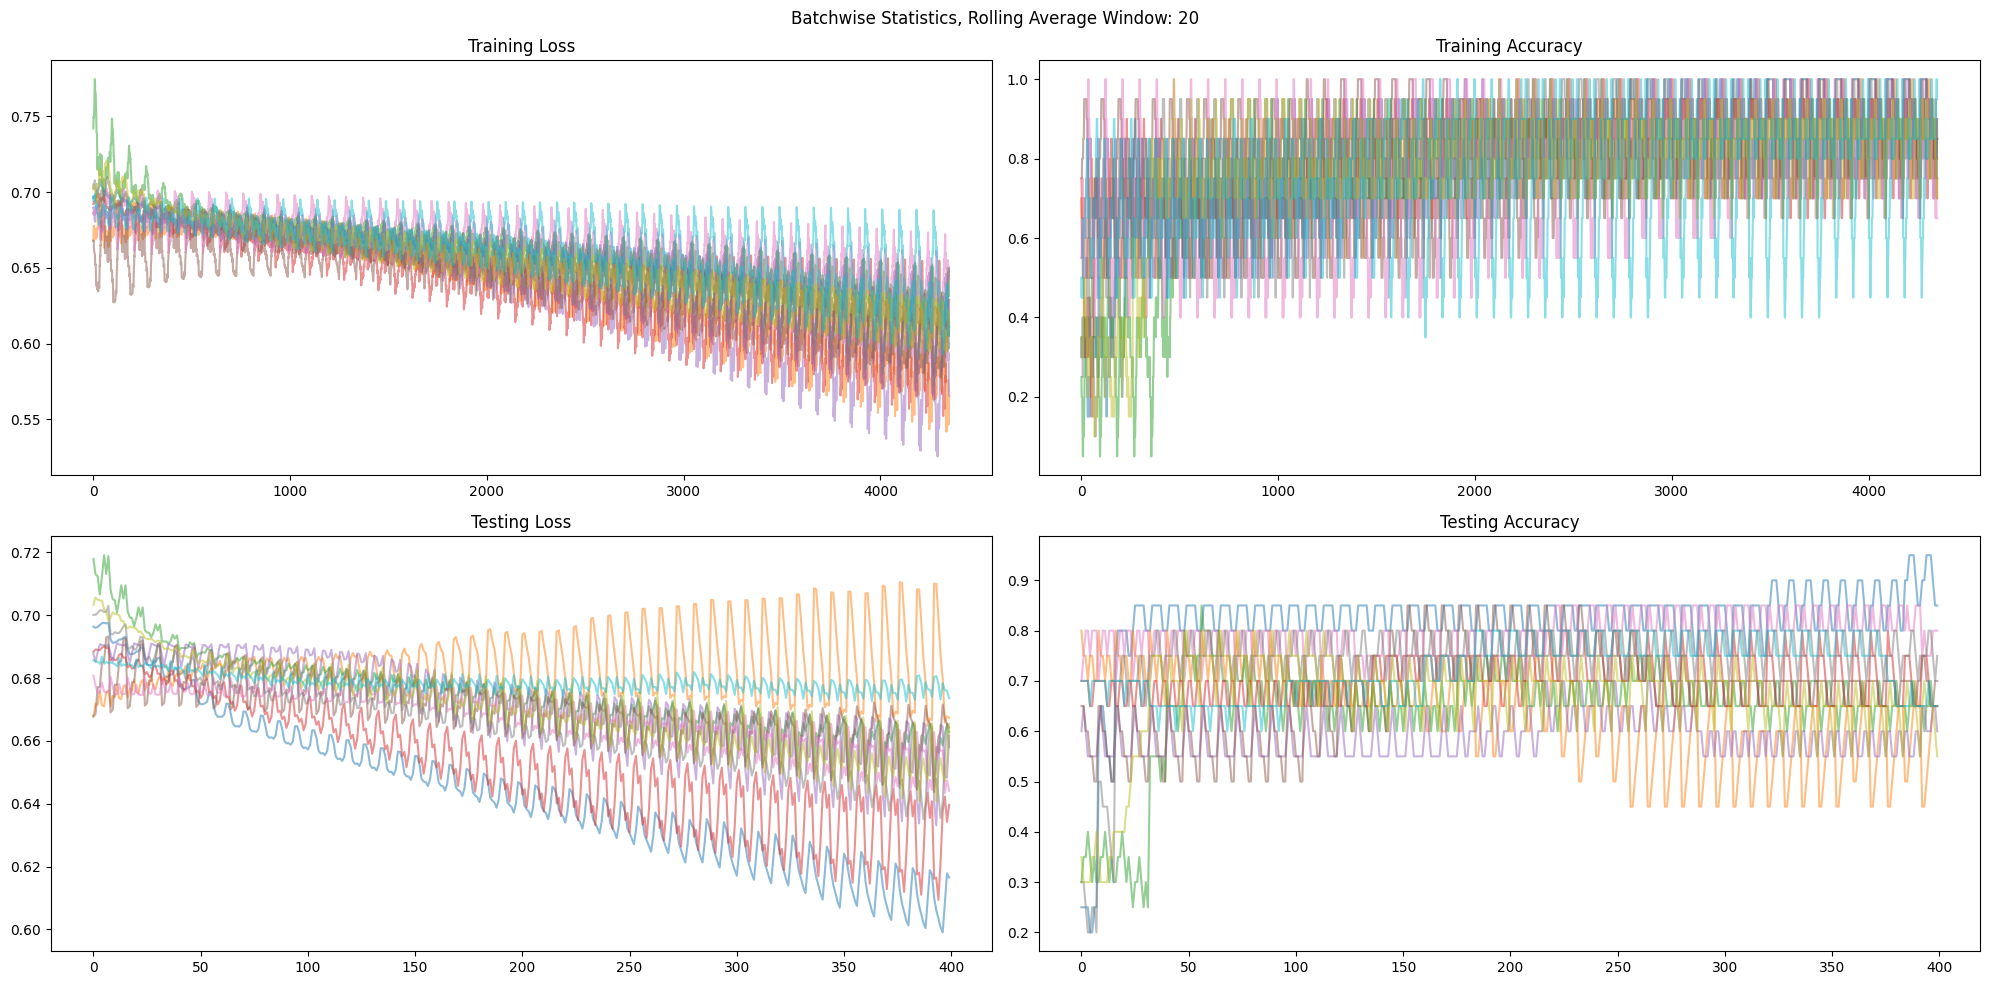

In [15]:
avg_results_alpha = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}
avg_results_beta = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}

for (results, avg_results) in [(results_alpha, avg_results_alpha), (results_beta, avg_results_beta)]:
    print("alpha" if results == results_alpha else "beta")
    fig, axs = plt.subplots(ncols = 2, nrows = 2)
    
    for stats in results:
        axs[0, 0].plot(stats['stats']["train-loss.csv"], alpha = 0.5)
        axs[0, 0].set_title("Training Loss")
        avg_results["train-loss.csv"].append(np.array(stats['stats']["train-loss.csv"]))

        axs[1, 0].plot(stats['stats']["test-loss.csv"], alpha = 0.5)
        axs[1, 0].set_title("Testing Loss")
        avg_results["test-loss.csv"].append(np.array(stats['stats']["test-loss.csv"]))

        axs[0, 1].plot(stats['stats']["train-acc.csv"], alpha = 0.5)
        axs[0, 1].set_title("Training Accuracy")
        avg_results["train-acc.csv"].append(np.array(stats['stats']["train-acc.csv"]))

        axs[1, 1].plot(stats['stats']["test-acc.csv"], alpha = 0.5)
        axs[1, 1].set_title("Testing Accuracy")
        avg_results["test-acc.csv"].append(np.array(stats['stats']["test-acc.csv"]))

    fig.suptitle(f"Batchwise Statistics, Rolling Average Window: {rolling_window}")
    plt.show()


alpha


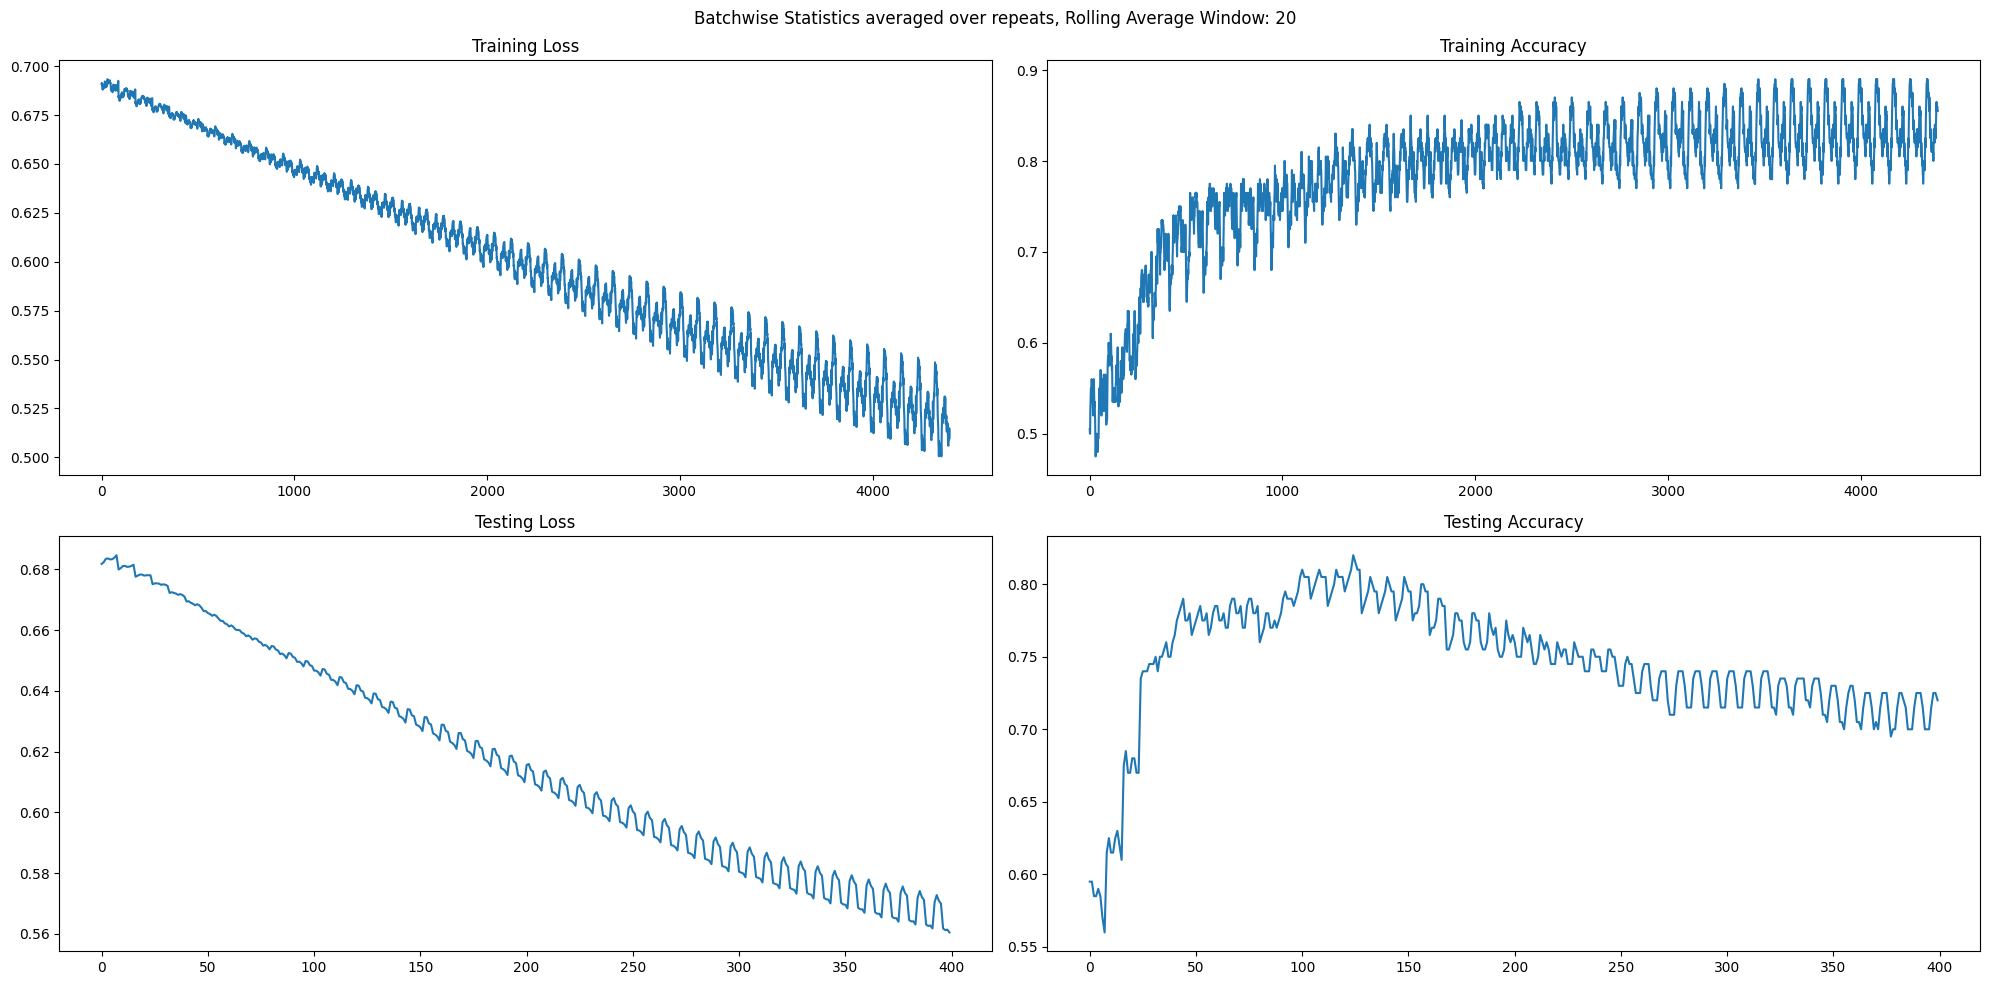

beta


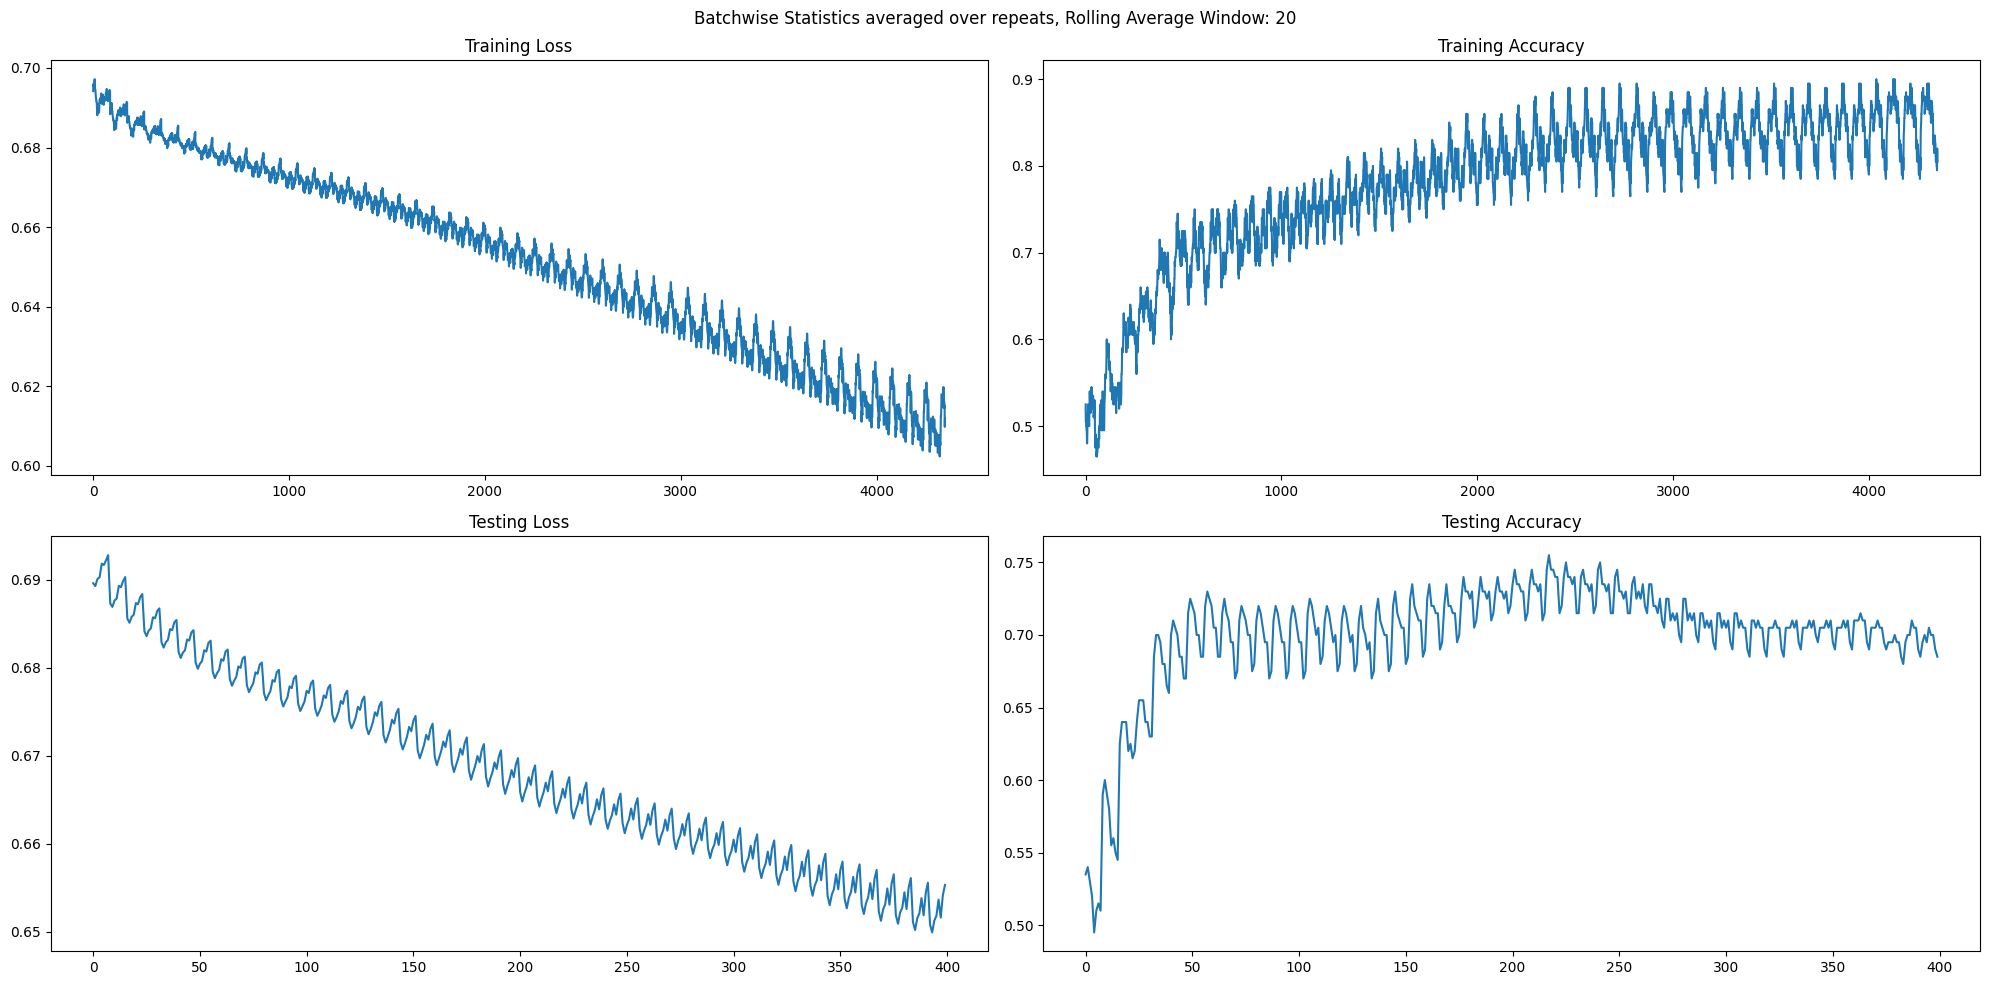

In [16]:
for avg_results, is_alpha in [(avg_results_alpha, True), (avg_results_beta, False)]:
    print("alpha" if is_alpha else "beta")

    fig, axs = plt.subplots(ncols = 2, nrows = 2)
    axs[0, 0].set_title("Training Loss")
    axs[1, 0].set_title("Testing Loss")
    axs[0, 1].set_title("Training Accuracy")
    axs[1, 1].set_title("Testing Accuracy")

    for key in avg_results.keys():
        maxlen = max(len(i) for i in avg_results[key])
        padded_arrs = np.array([np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan) for arr in avg_results[key]])
        avg_results[key] = np.mean(padded_arrs, axis = 0)

    axs[0, 0].plot(avg_results["train-loss.csv"])
    axs[1, 0].plot(avg_results["test-loss.csv"])
    axs[0, 1].plot(avg_results["train-acc.csv"])
    axs[1, 1].plot(avg_results["test-acc.csv"])

    fig.suptitle(f"Batchwise Statistics averaged over repeats, Rolling Average Window: {rolling_window}")
    plt.show()

alpha


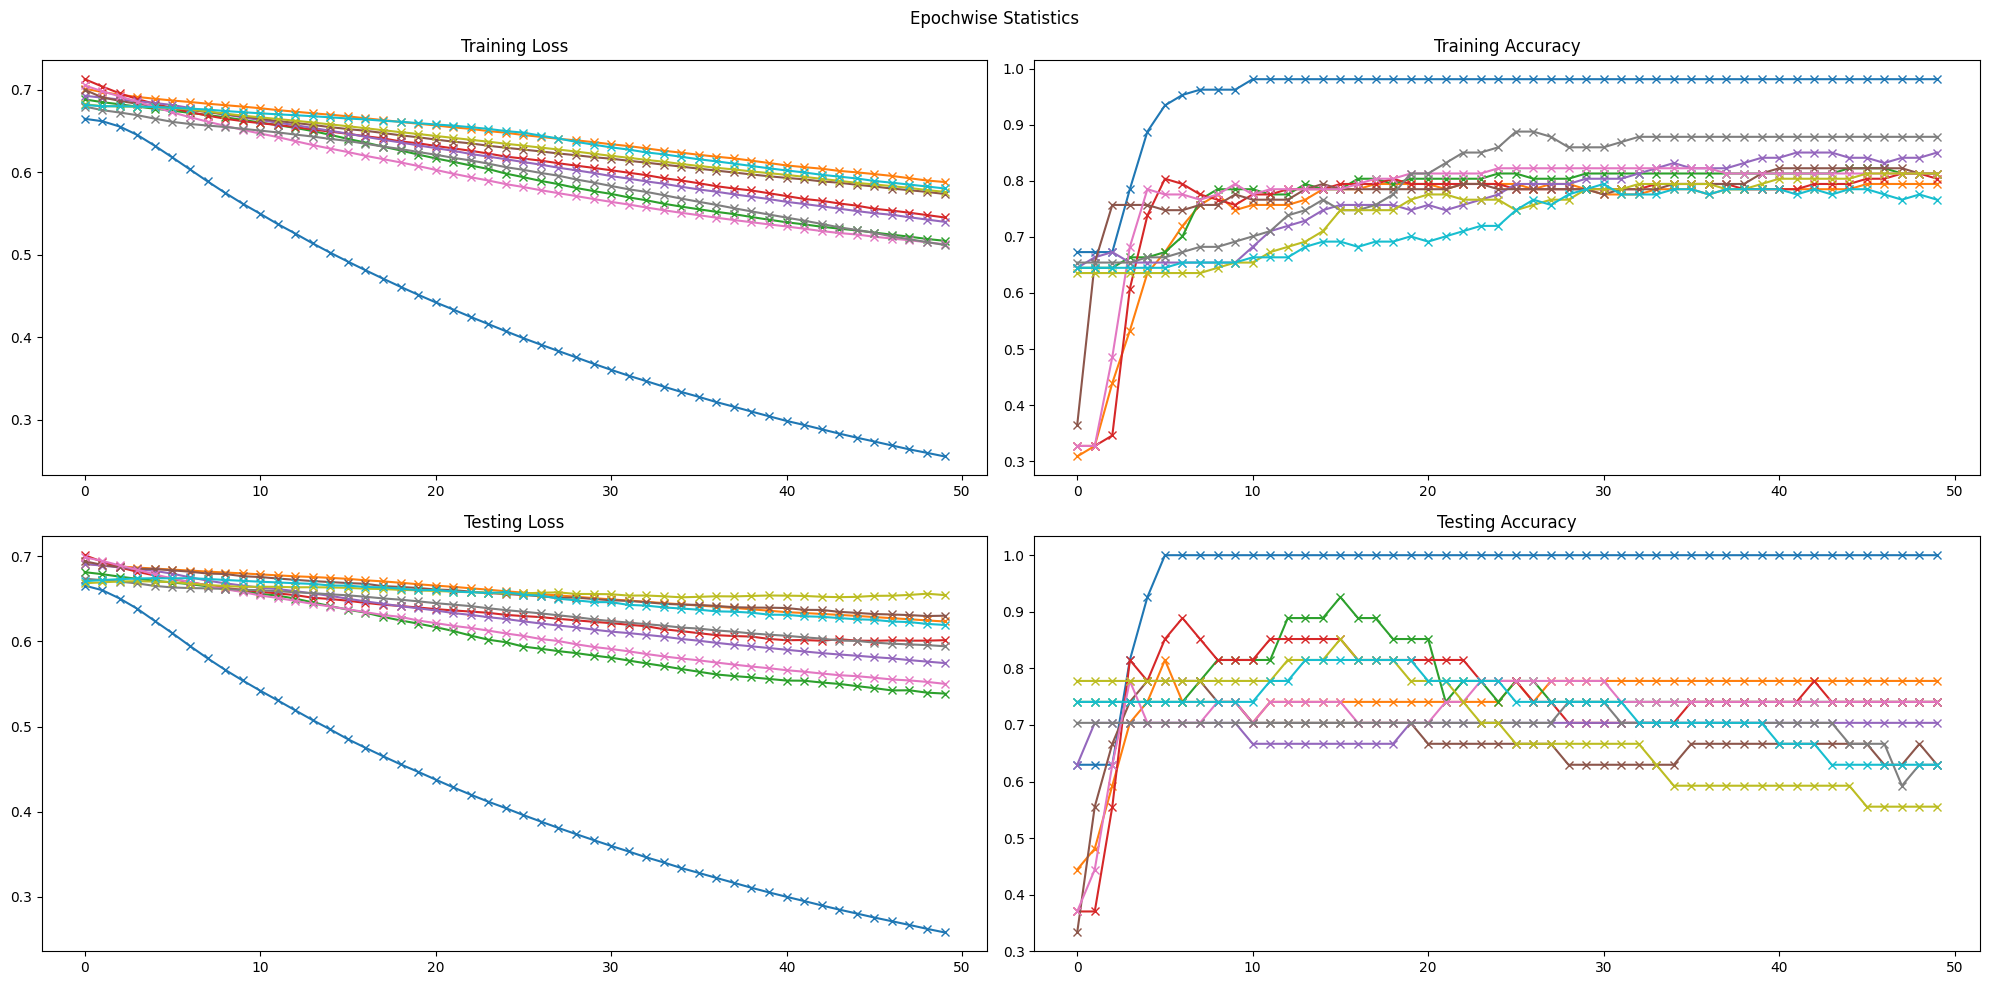

beta


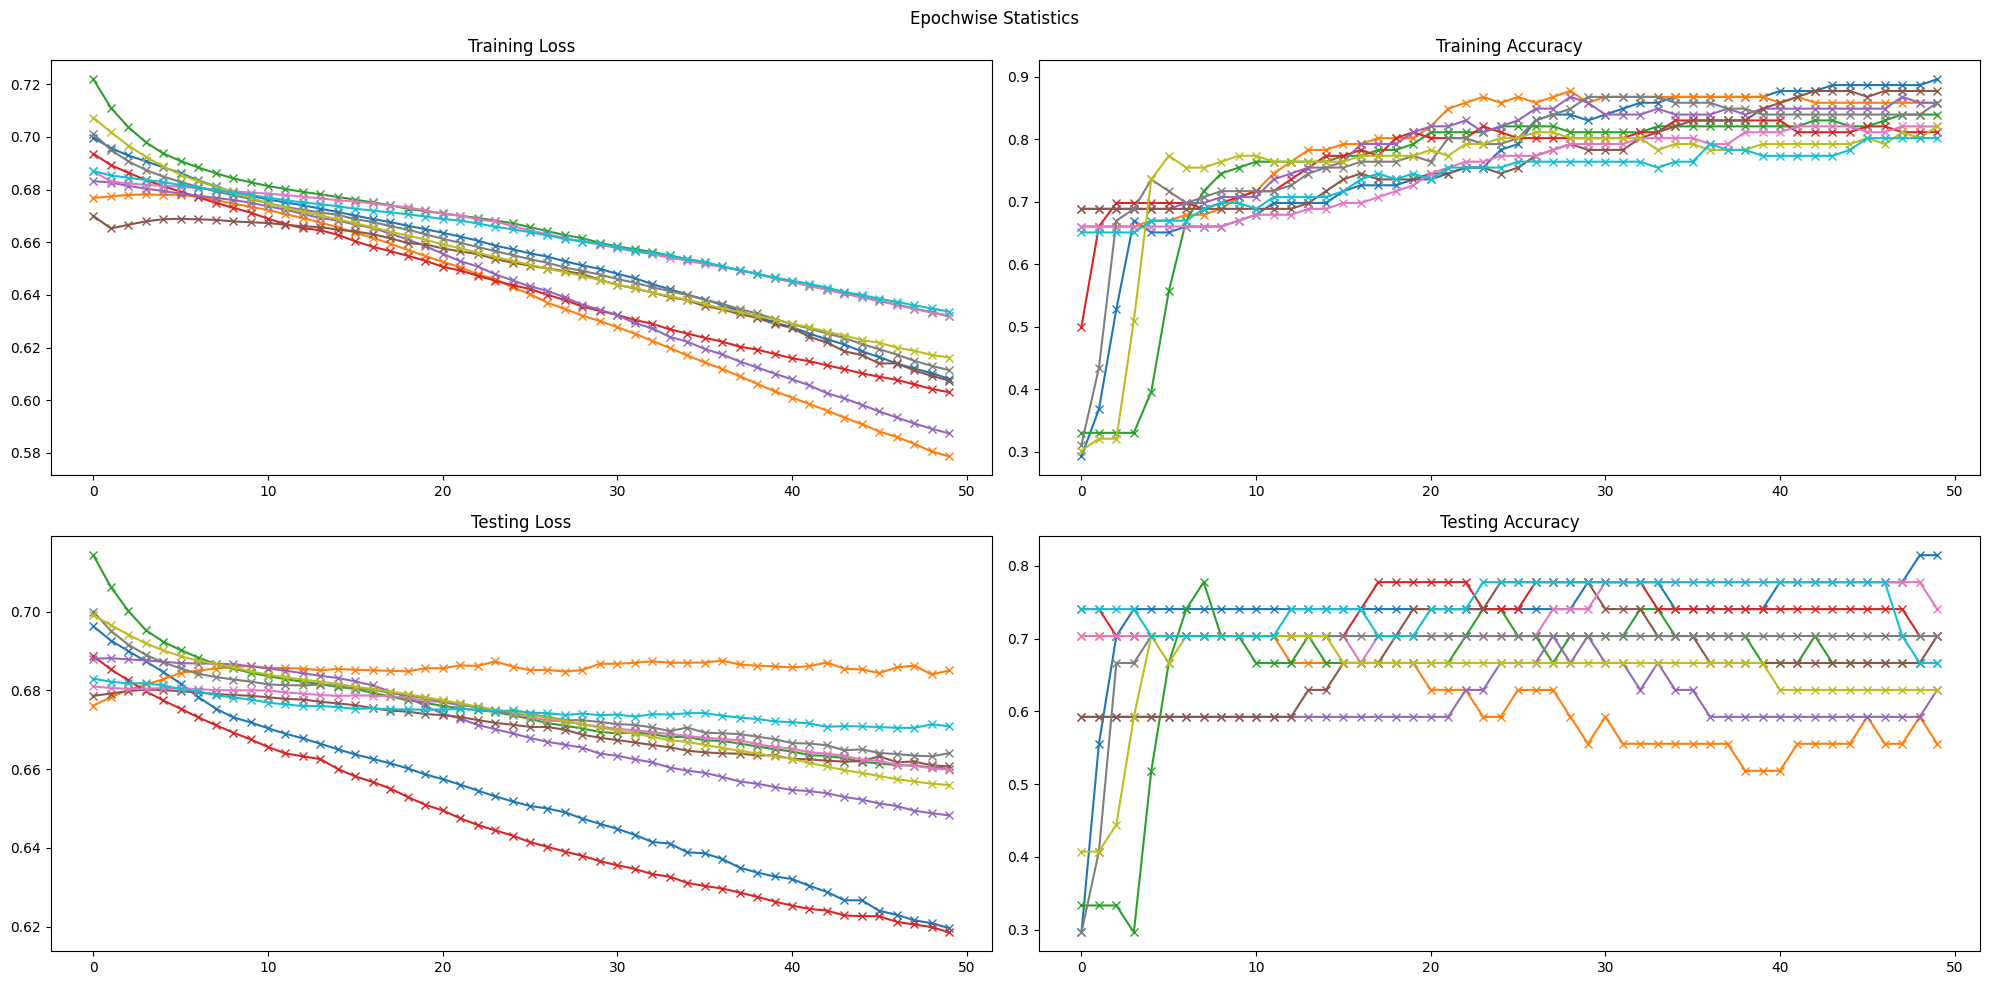

In [17]:
avg_results_alpha = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}
best_loss_alpha = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}

avg_results_beta = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}
best_loss_beta = {"train-acc.csv": [], "train-loss.csv": [], "test-acc.csv": [], "test-loss.csv": []}


for (avg_results, best_loss, results, bestepochs) in [(avg_results_alpha, best_loss_alpha, results_alpha, bestepochs_alpha), (avg_results_beta, best_loss_beta, results_beta, bestepochs_beta)]:
    print("alpha" if results == results_alpha else "beta")

    fig, axs = plt.subplots(ncols = 2, nrows = 2)
    fig.suptitle(f"Epochwise Statistics")
    for i, stats, beste in zip(list(range(len(results))), results, bestepochs):
        axs[0, 0].plot(stats['epochwisestats']["train-loss.csv"], marker = "x")
        #axs[0, 0].axvline(beste, c = f"C{i}")
        axs[0, 0].set_title("Training Loss")
        avg_results["train-loss.csv"].append(np.array(stats['epochwisestats']["train-loss.csv"]))
        best_loss["train-loss.csv"].append(stats['epochwisestats']["train-loss.csv"][beste])

        axs[1, 0].plot(stats['epochwisestats']["test-loss.csv"], marker = "x")
        #axs[1, 0].axvline(beste, c = f"C{i}")
        axs[1, 0].set_title("Testing Loss")
        avg_results["test-loss.csv"].append(np.array(stats['epochwisestats']["test-loss.csv"]))
        best_loss["test-loss.csv"].append(stats['epochwisestats']["test-loss.csv"][beste])

        axs[0, 1].plot(stats['epochwisestats']["train-acc.csv"], marker = "x")
        #axs[0, 1].axvline(beste, c = f"C{i}")
        axs[0, 1].set_title("Training Accuracy")
        avg_results["train-acc.csv"].append(np.array(stats['epochwisestats']["train-acc.csv"]))
        best_loss["train-acc.csv"].append(stats['epochwisestats']["train-acc.csv"][beste])

        axs[1, 1].plot(stats['epochwisestats']["test-acc.csv"], marker = "x")
        #axs[1, 1].axvline(beste, c = f"C{i}")
        axs[1, 1].set_title("Testing Accuracy")
        avg_results["test-acc.csv"].append(np.array(stats['epochwisestats']["test-acc.csv"]))
        best_loss["test-acc.csv"].append(stats['epochwisestats']["test-acc.csv"][beste])
    
    plt.show()

In [18]:
for best_loss in [best_loss_alpha, best_loss_beta]:
    print("alpha" if best_loss == best_loss_alpha else "beta")

    for key, item in best_loss.items():
        print (f"{key}: {round(np.min(item), 3)} - {round(np.max(item), 3)} ($\mu$: {round(np.mean(item), 3)})")

alpha
train-acc.csv: 0.692 - 0.981 ($\mu$: 0.813)
train-loss.csv: 0.256 - 0.658 ($\mu$: 0.577)
test-acc.csv: 0.63 - 1.0 ($\mu$: 0.793)
test-loss.csv: 0.258 - 0.669 ($\mu$: 0.595)
beta
train-acc.csv: 0.689 - 0.858 ($\mu$: 0.816)
train-loss.csv: 0.579 - 0.667 ($\mu$: 0.629)
test-acc.csv: 0.556 - 0.778 ($\mu$: 0.681)
test-loss.csv: 0.641 - 0.685 ($\mu$: 0.662)


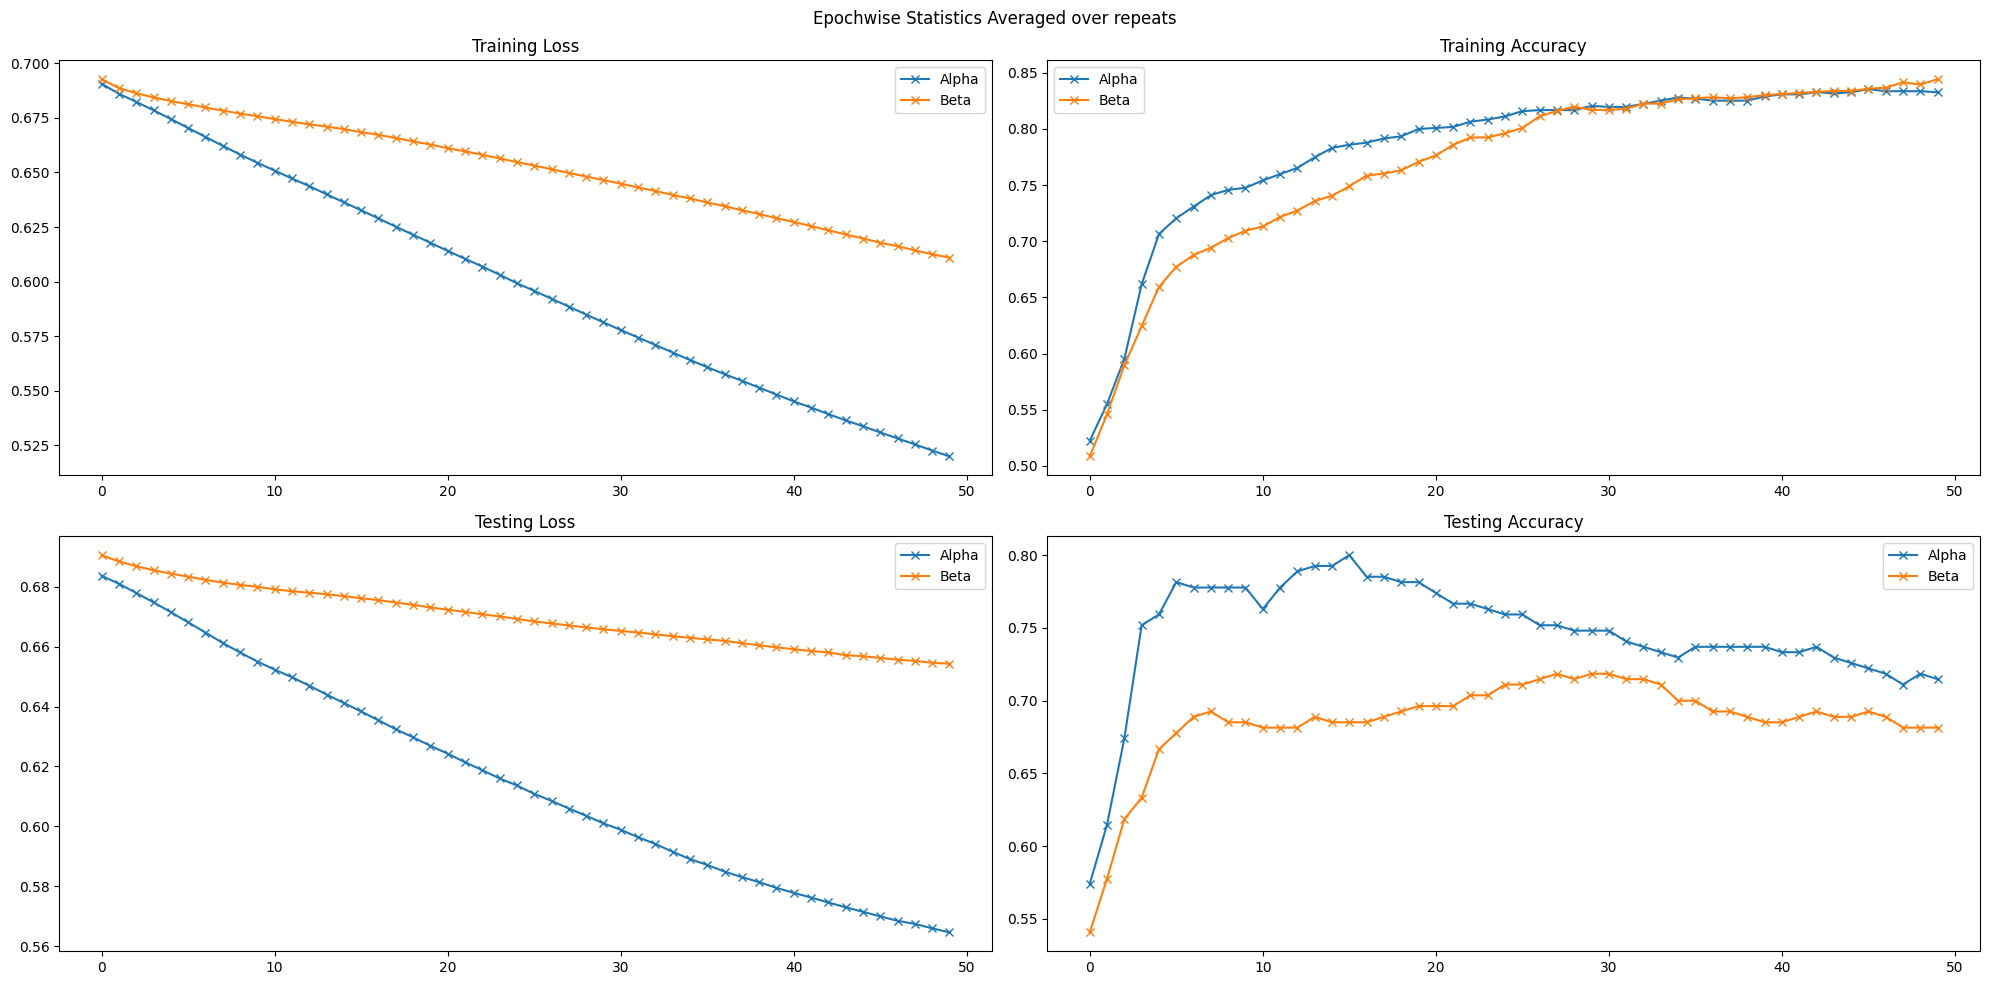

In [19]:
fig, axs = plt.subplots(ncols = 2, nrows = 2)

axs[0, 0].set_title("Training Loss")
axs[1, 0].set_title("Testing Loss")
axs[0, 1].set_title("Training Accuracy")
axs[1, 1].set_title("Testing Accuracy")

for avg_results in [avg_results_alpha, avg_results_beta]:
    avg_results = avg_results.copy()

    for key in avg_results.keys():
        maxlen = max(len(i) for i in avg_results[key])
        padded_arrs = np.array([np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan) for arr in avg_results[key]])
        avg_results[key] = np.nanmean(padded_arrs, axis = 0)

    axs[0, 0].plot(avg_results["train-loss.csv"], marker = "x")
    axs[1, 0].plot(avg_results["test-loss.csv"], marker = "x")
    axs[0, 1].plot(avg_results["train-acc.csv"], marker = "x")
    axs[1, 1].plot(avg_results["test-acc.csv"], marker = "x")

    axs[0, 0].legend(["Alpha", "Beta"])
    axs[1, 0].legend(["Alpha", "Beta"])
    axs[0, 1].legend(["Alpha", "Beta"])
    axs[1, 1].legend(["Alpha", "Beta"])

fig.suptitle(f"Epochwise Statistics Averaged over repeats")
plt.show()

alpha


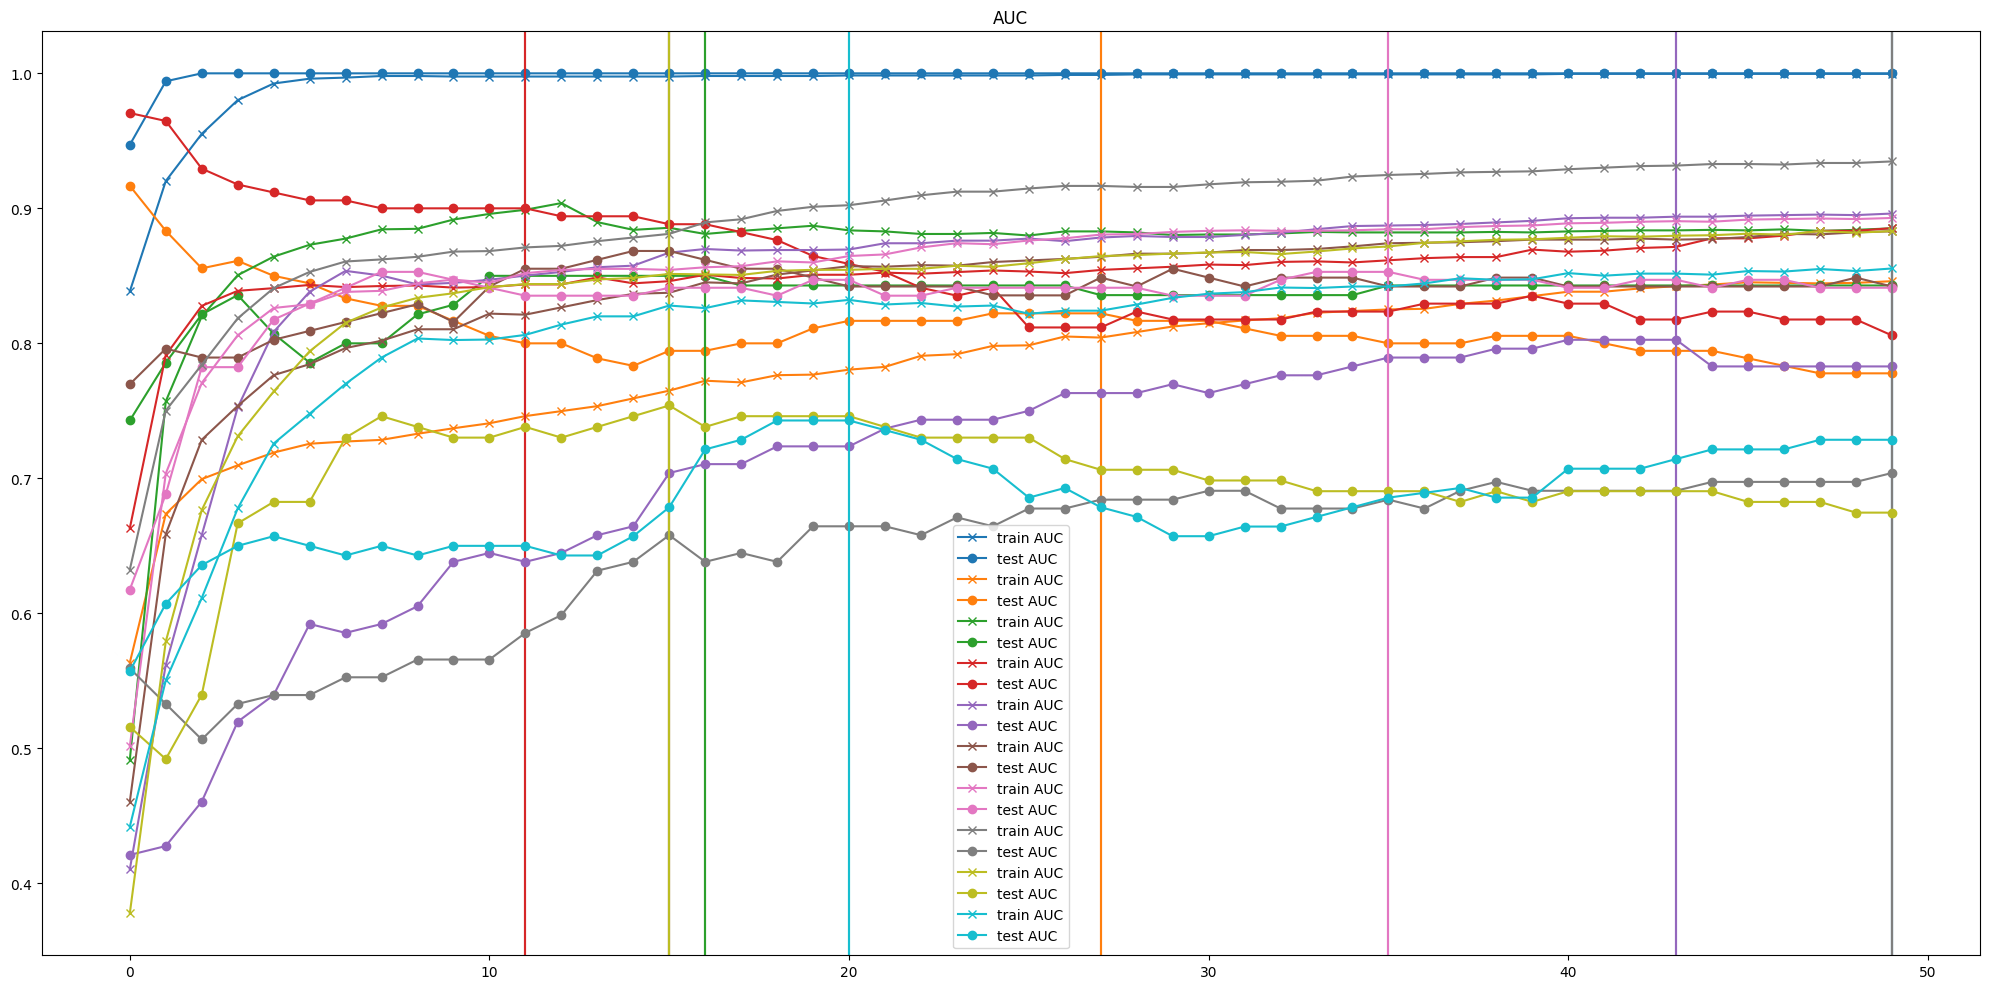

beta


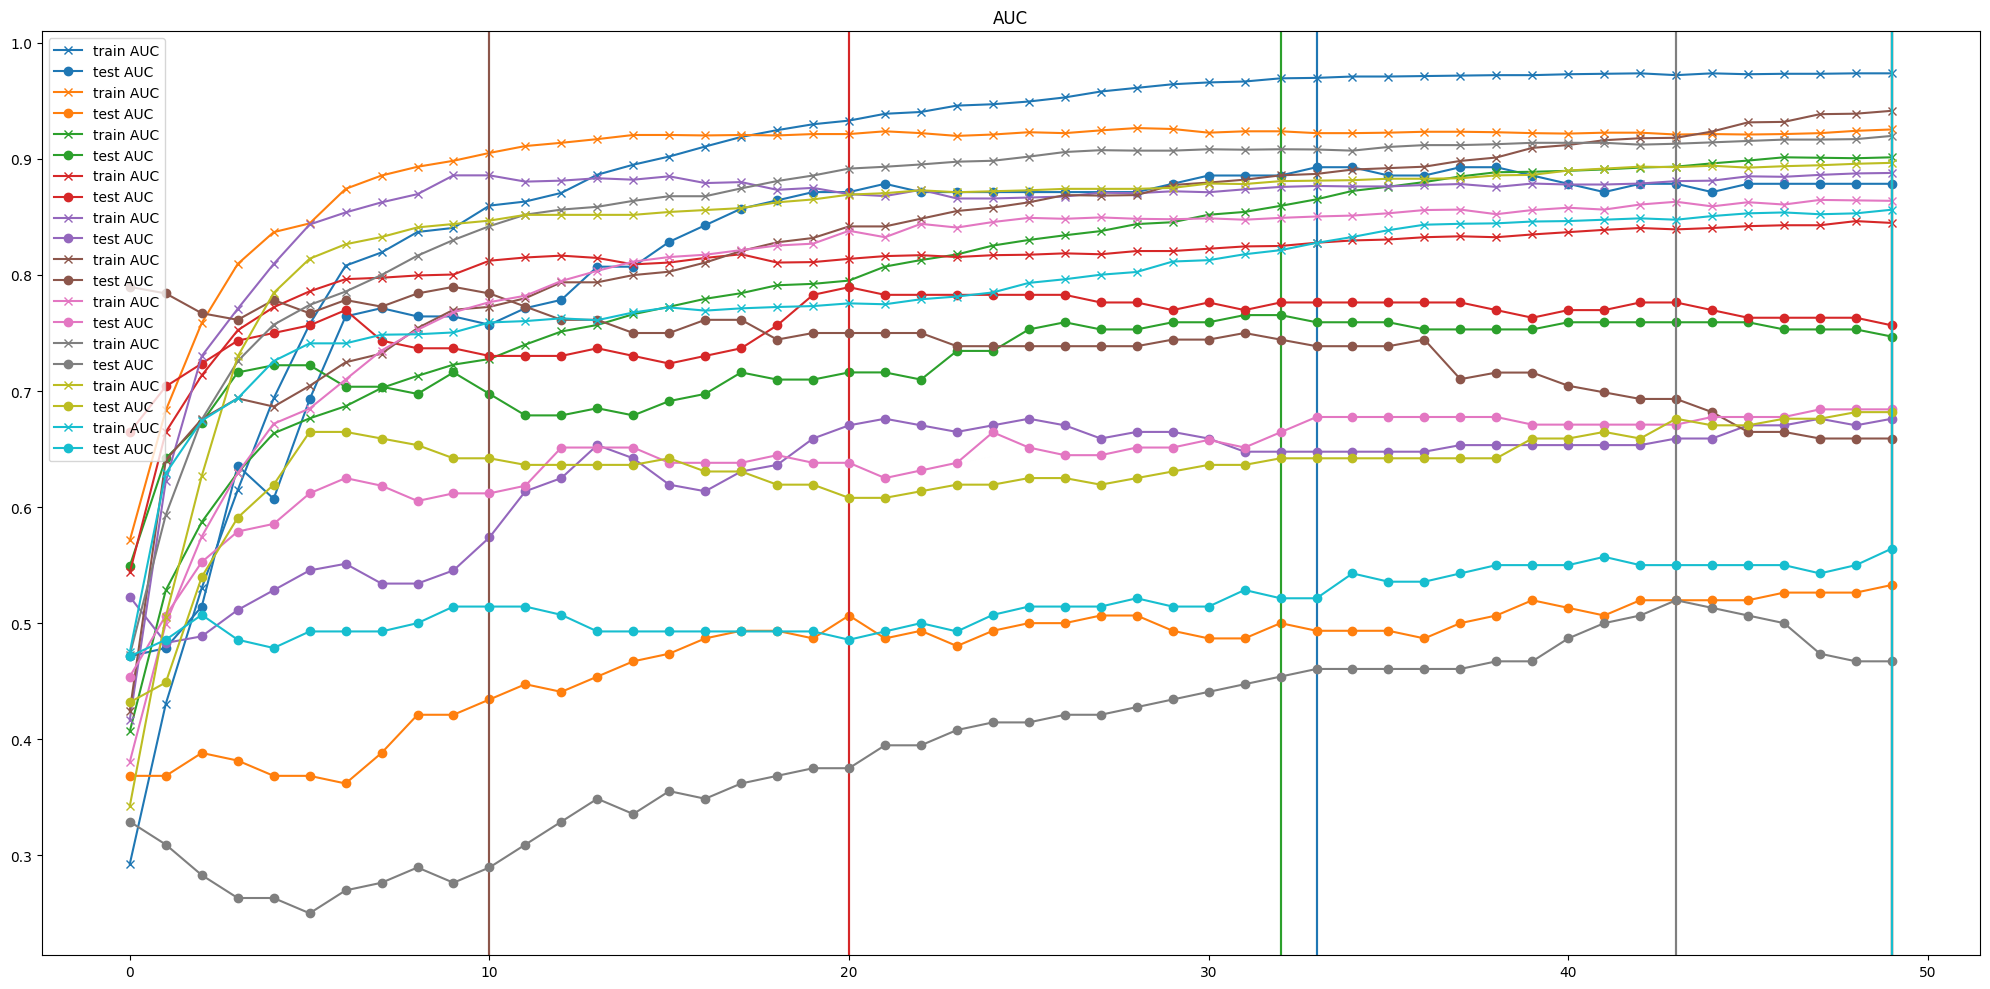

In [20]:
avg_results_alpha = {"train": [], "test": []}
avg_results_beta = {"train": [], "test": []}

for (avg_results, results, bestepochs) in [(avg_results_alpha, results_alpha, bestepochs_alpha), (avg_results_beta, results_beta, bestepochs_beta)]:
    print("alpha" if results == results_alpha else "beta")
    
    for i, stats in enumerate(results):
        for key, val in stats['aucstats'].items():
            t = key.replace(".csv", "").split("-")[0]
            plt.plot(val, label = f"{t} AUC", marker = "x" if t == "train" else "o", c = f"C{i}")
            plt.axvline(bestepochs[i], c = f"C{i}")
            avg_results[t].append(np.array(val))

    plt.title("AUC")
    plt.legend()
    plt.show()

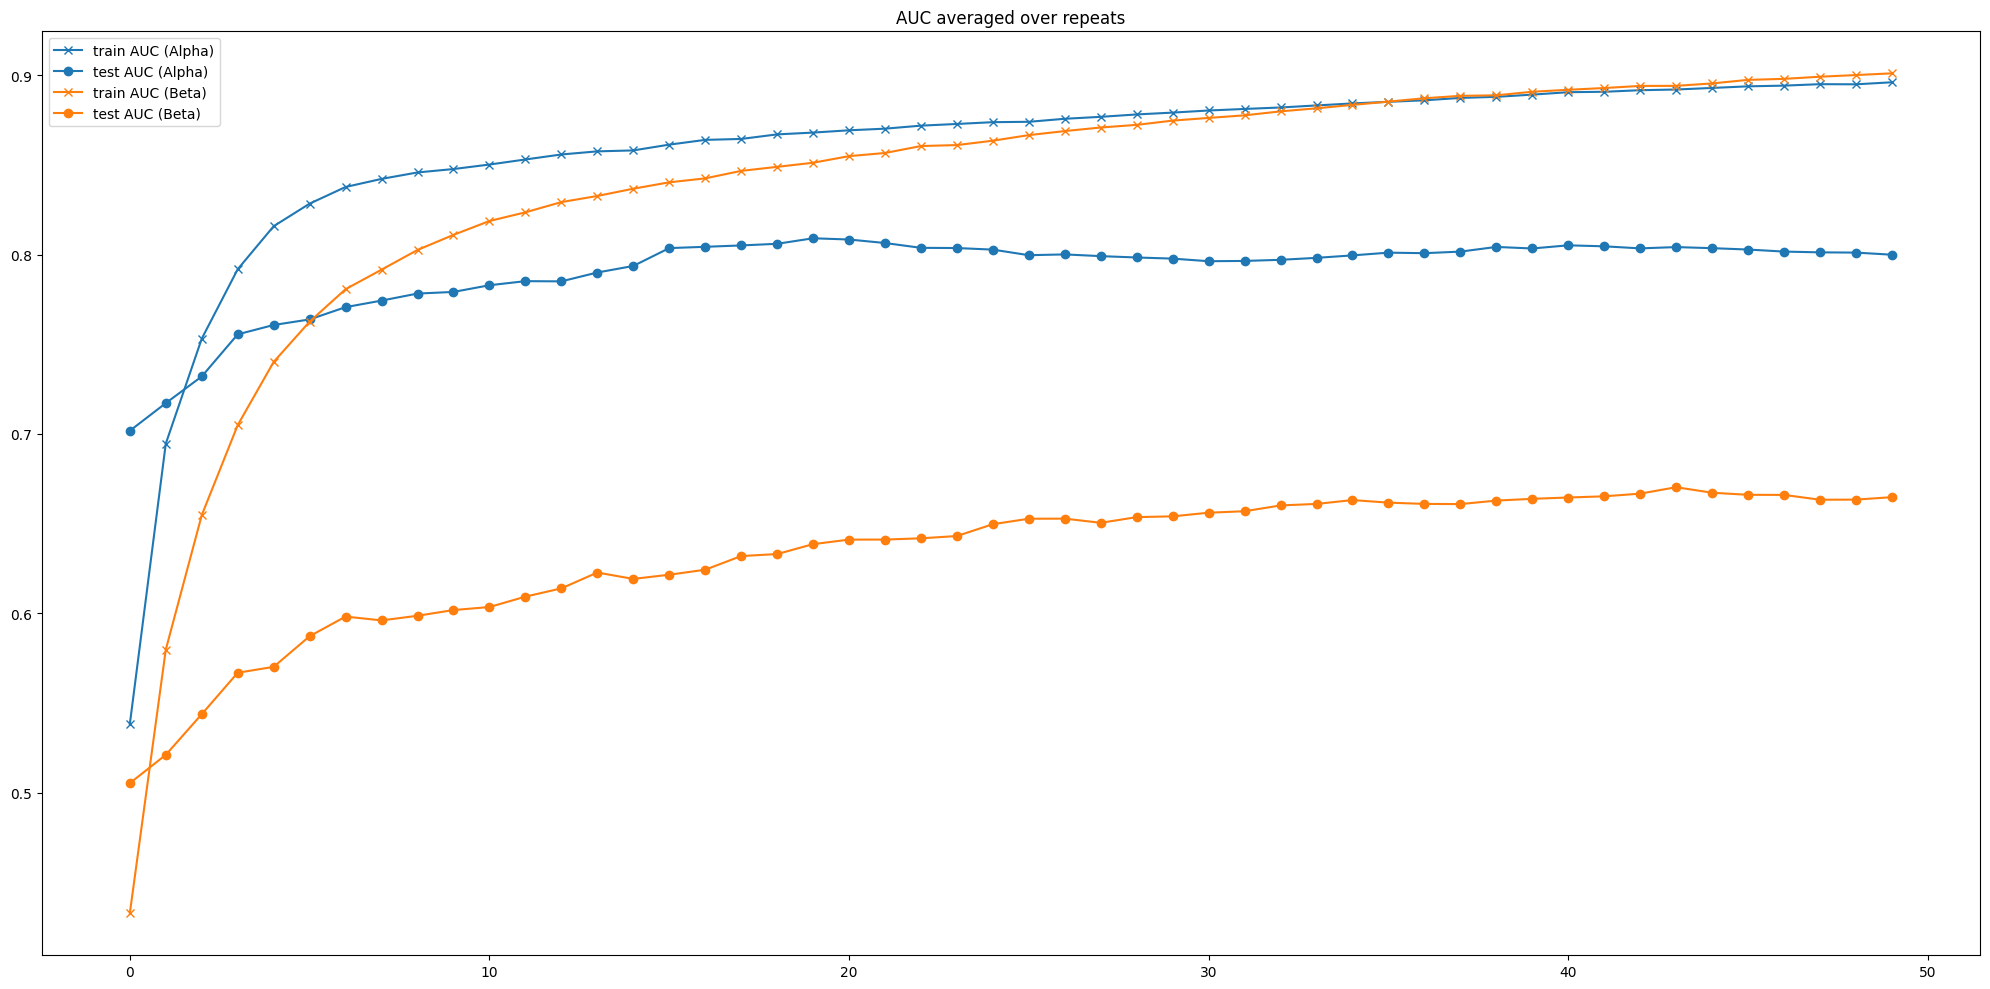

In [21]:
import matplotlib.pyplot as plt
import numpy as np

color_map = {
    True: 'C0',   # alpha
    False: 'C1'   # beta
}

linestyle_map = {
    True: '-',
    False: '-'
}

for (avg_results, best_loss, is_alpha) in [
    (avg_results_alpha, best_loss_alpha, True),
    (avg_results_beta, best_loss_beta, False)
]:
    for key, val in avg_results.items():
        maxlen = max(len(i) for i in val)
        padded_arrs = np.array([
            np.pad(arr.astype(float), (0, maxlen - len(arr)), constant_values=np.nan)
            for arr in val
        ])
        val = np.nanmean(padded_arrs, axis=0)

        t = key.replace(".csv", "").split("-")[0]
        marker = "x" if "train" in key.lower() else "o"

        plt.plot(
            val,
            label=f"{t} AUC {'(Alpha)' if is_alpha else '(Beta)'}",
            color=color_map[is_alpha],
            linestyle=linestyle_map[is_alpha],
            marker=marker
        )

        avg_results[t].append(np.array(val))

plt.title("AUC averaged over repeats")
plt.legend()
plt.show()


alpha


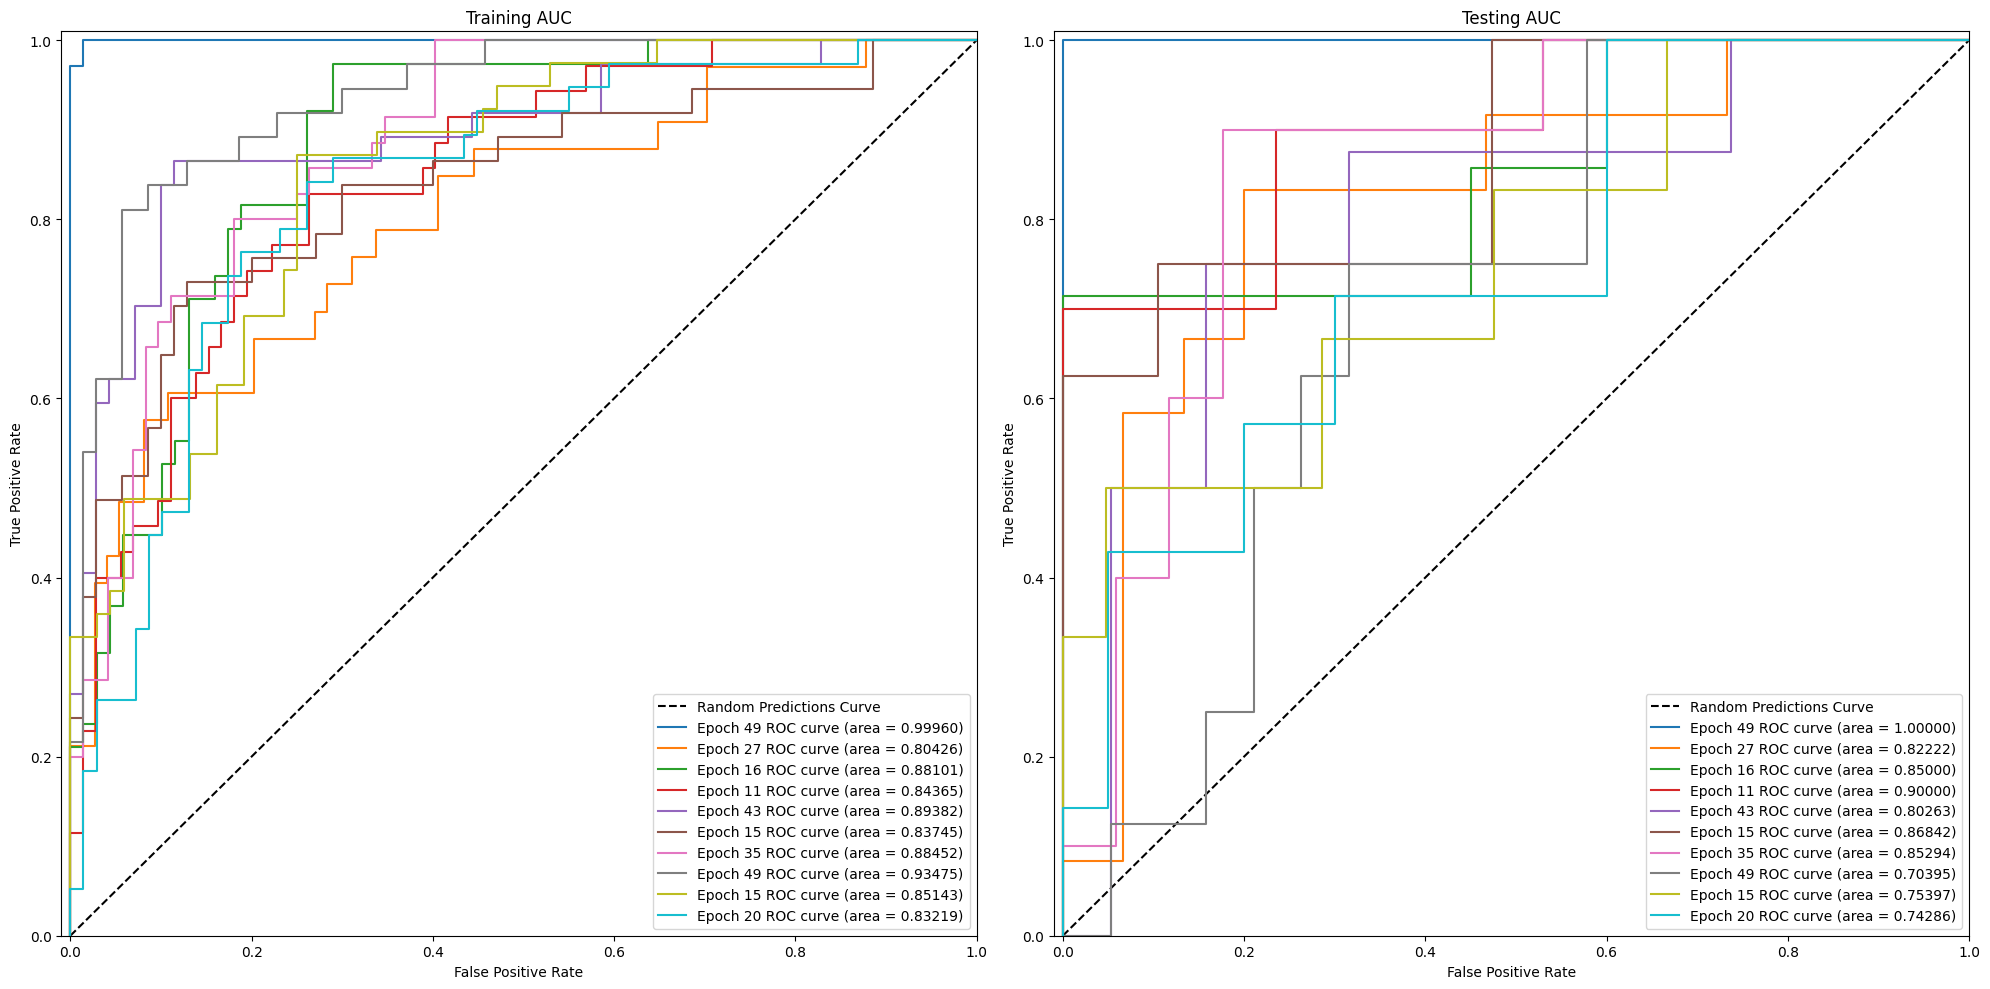

beta


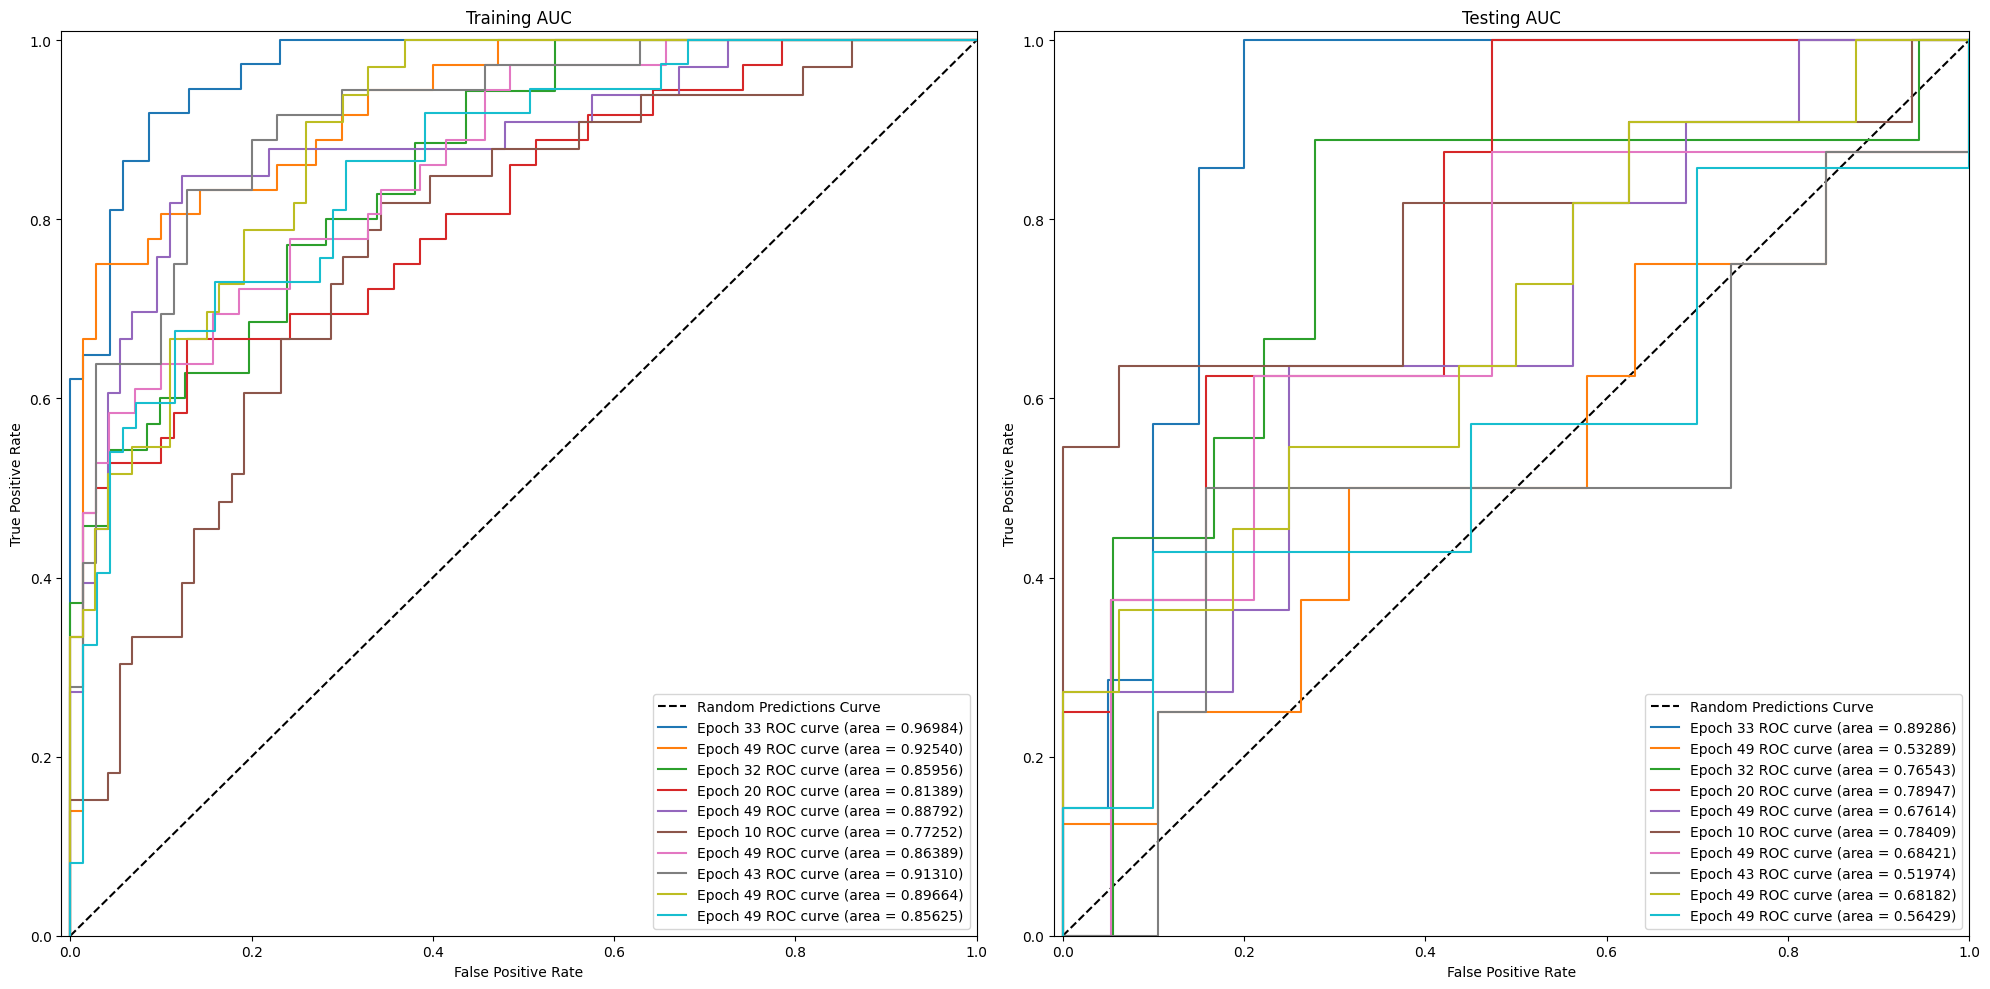

In [22]:
aucs_alpha = {"train": [], "test": []}
aucs_beta = {"train": [], "test": []}

for (results, bestepochs, aucs) in [(results_alpha, bestepochs_alpha, aucs_alpha), (results_beta, bestepochs_beta, aucs_beta)]:
    print("alpha" if results == results_alpha else "beta")
    fig, axs = plt.subplots(ncols = 2)
    axs[0].plot([0, 1], [0, 1], "k--", label = "Random Predictions Curve")
    axs[1].plot([0, 1], [0, 1], "k--", label = "Random Predictions Curve")

    for bestepoch, res in zip(bestepochs, results):
        epochwiseauc = res["epochwiseauc"]
        aucstats = res["aucstats"]
        for key in epochwiseauc.keys():
            fpr, tpr, thresholds = epochwiseauc[key][bestepoch]
            aucs["train" if "train" in key else "test"].append(aucstats[key][bestepoch])
            axs[0 if "train" in key else 1].plot(fpr, tpr, label = f"Epoch {bestepoch} ROC curve (area = {aucstats[key][bestepoch]:.5f})")
            axs[0 if "train" in key else 1].set_xlim([-0.01, 1])
            axs[0 if "train" in key else 1].set_ylim([0, 1.01])
            axs[0 if "train" in key else 1].set_xlabel("False Positive Rate")
            axs[0 if "train" in key else 1].set_ylabel("True Positive Rate")

    axs[0].legend()
    axs[1].legend()
    axs[0].set_title("Training AUC")
    axs[1].set_title("Testing AUC")
    plt.show()

In [23]:
for aucs in [aucs_alpha, aucs_beta]:
    print("alpha" if aucs == aucs_alpha else "beta")
    for key, item in aucs.items():
        print (f"{key}: {round(np.min(item), 3)} - {round(np.max(item), 3)} ($\mu$: {round(np.mean(item), 3)})")

alpha
train: 0.804 - 1.0 ($\mu$: 0.876)
test: 0.704 - 1.0 ($\mu$: 0.83)
beta
train: 0.773 - 0.97 ($\mu$: 0.876)
test: 0.52 - 0.893 ($\mu$: 0.689)


alpha


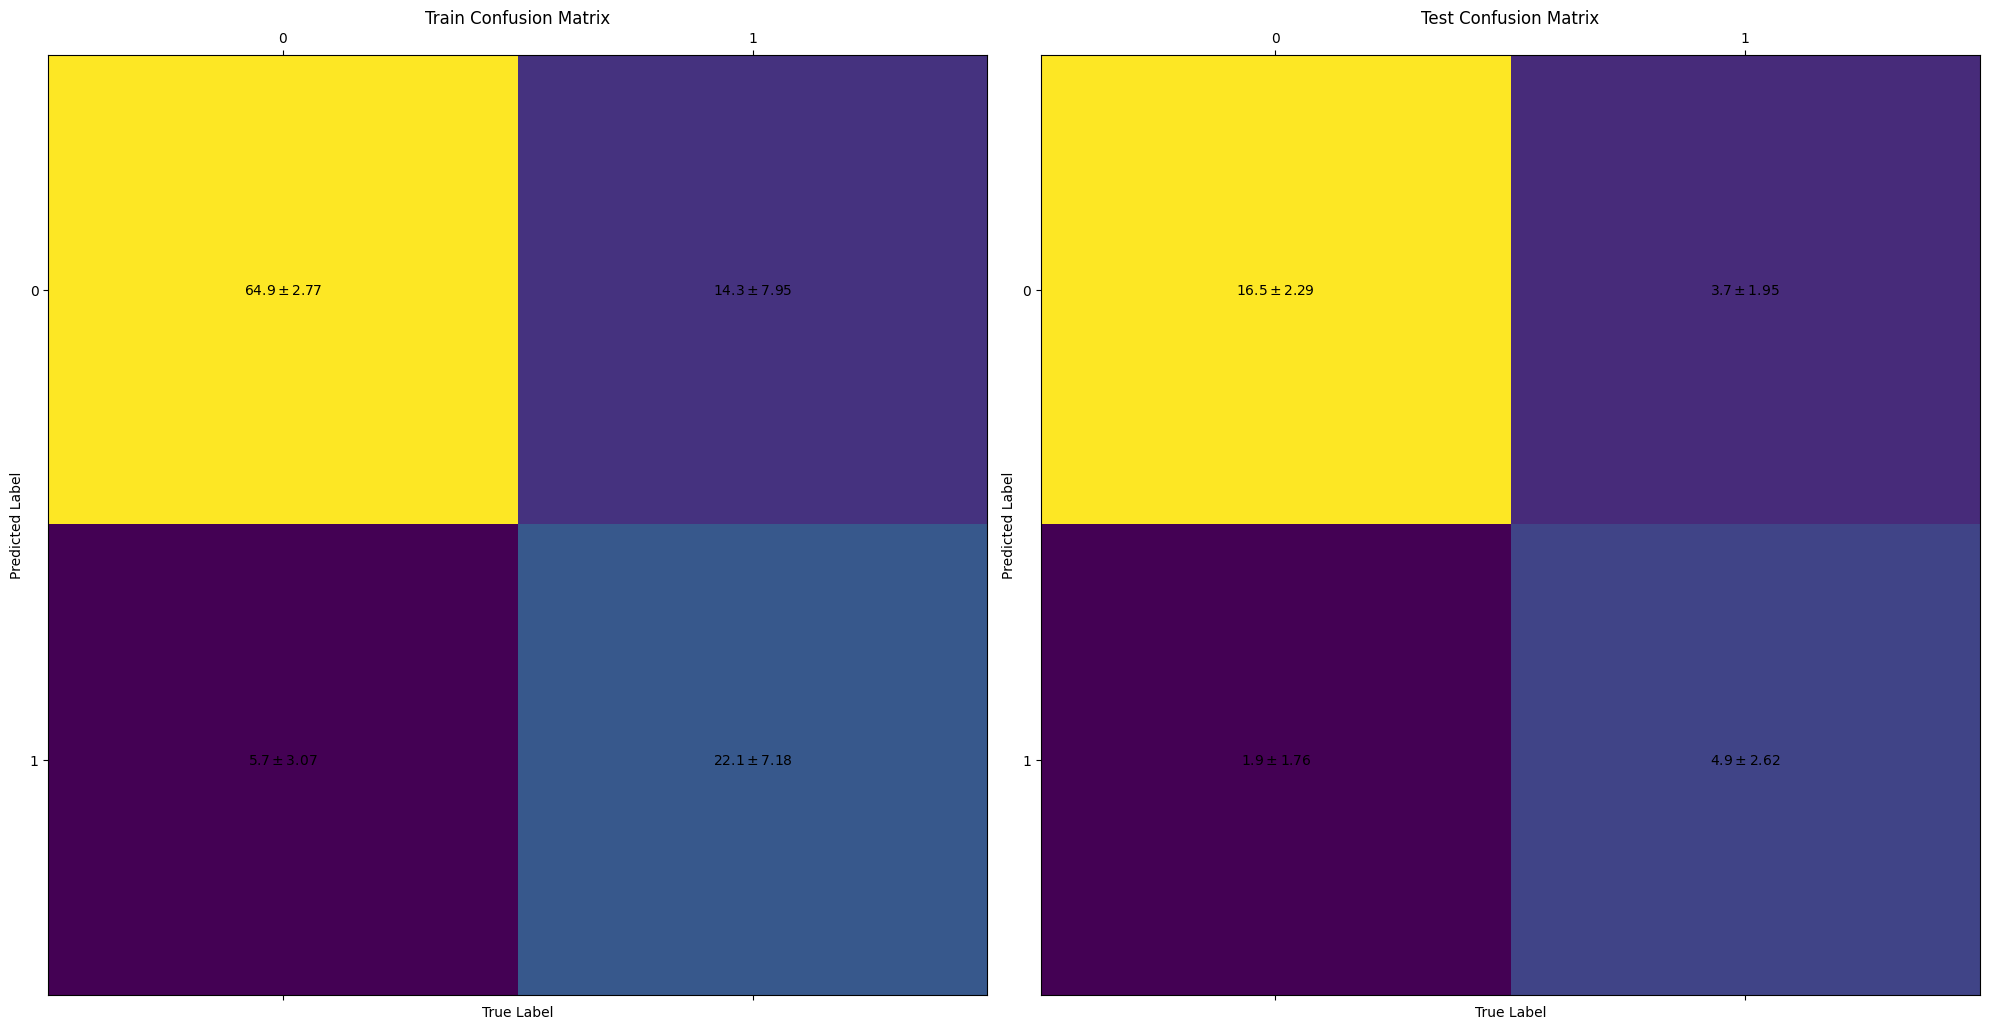

beta


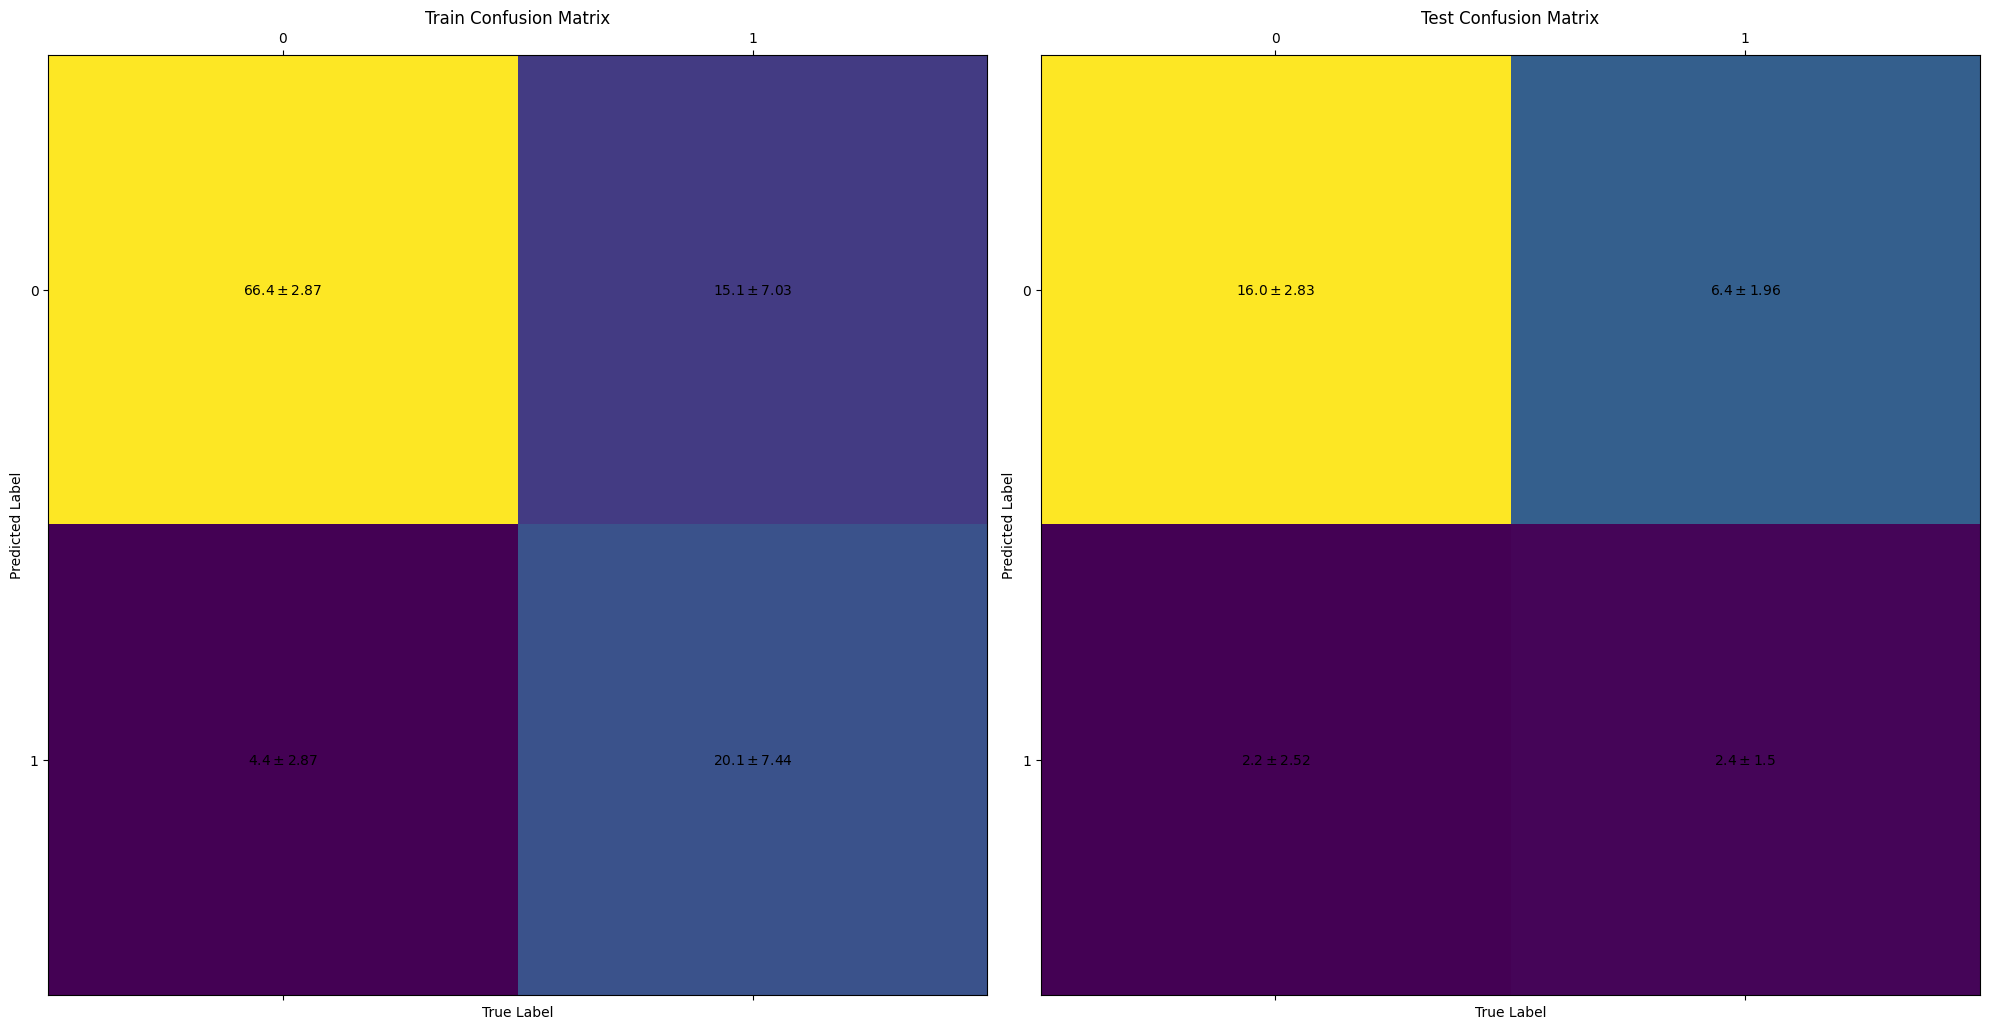

In [24]:
for (folders, bestepochs) in [(folders_alpha, bestepochs_alpha), (folders_beta, bestepochs_beta)]:
    print("alpha" if folders == folders_alpha else "beta")
    fig, axs = plt.subplots(ncols = 2)
    cms = {"train": [], "test": []}

    for foldername, bestepoch in zip(folders, bestepochs):
        dirs = Path.cwd() / foldername / f"Epoch {bestepoch}"
        data = {"train": None, "test": None}

        for i in list(dirs.glob("*-preds.csv")):
            info = i.name.replace("-preds.csv", "")
            df = pd.read_csv(i)
            data[info] = df
        
        for i, key in enumerate(list(data.keys())):
            conf = np.zeros((2, 2))
            df_ = data[key].copy()
            df_["preds"] = df_["preds"].map(lambda x: 1 if x >= 0.5 else 0)
            conf[0, 0] = ((df_["preds"] == 0) & (df_["actual"] == 0)).sum()
            conf[0, 1] = ((df_["preds"] == 0) & (df_["actual"] == 1)).sum()
            conf[1, 0] = ((df_["preds"] == 1) & (df_["actual"] == 0)).sum()
            conf[1, 1] = ((df_["preds"] == 1) & (df_["actual"] == 1)).sum()
            cms[key].append(conf)

    confmean = {k: np.mean(i, axis = 0) for k, i in cms.items()}
    confstd = {k: np.std(i, axis = 0) for k, i in cms.items()}
    for i, key in enumerate(list(confmean.keys())):
        axs[i].matshow(confmean[key])
        for x in range(2):
            for y in range(2):
                axs[i].text(x, y, f"${round(confmean[key][y, x], 2)}\pm{round(confstd[key][y, x], 2)}$", va = "center", ha = "center")

        axs[i].set_xlabel("True Label")
        axs[i].set_ylabel("Predicted Label")
        axs[i].set_title(f"{key.title()} Confusion Matrix")
    
    plt.show()